In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar a base de dados
df = pd.read_csv('db_ibge_pnad_2020.csv')

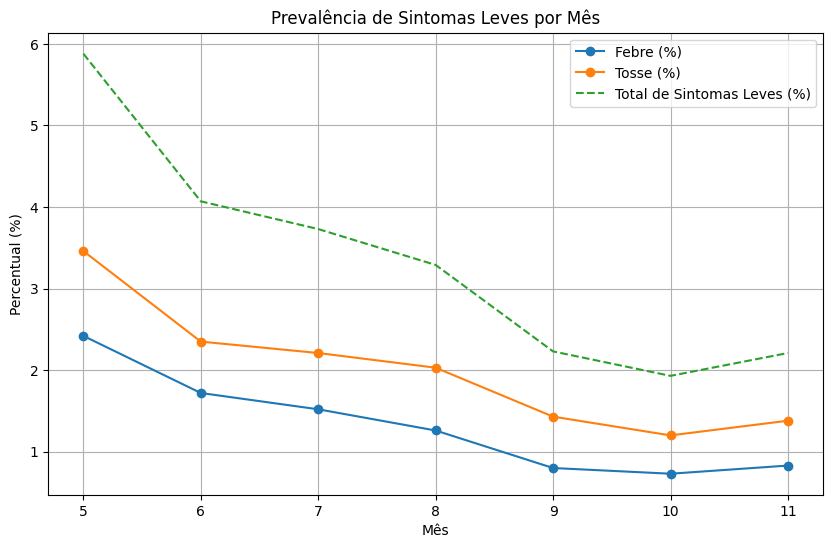

In [13]:
# 1. Sintomas Predominantes
# Calcular a porcentagem de sintomas predominantes por mês
df['perc_sintomas_leves'] = df['perc_febre'] + df['perc_tosse']  # Febre e Tosse como sintomas leves

def plot_sintomas(df):
    """Gráfico de linha para sintomas leves por mês."""
    plt.figure(figsize=(10, 6))
    plt.plot(df['MES'], df['perc_febre'], label='Febre (%)', marker='o')
    plt.plot(df['MES'], df['perc_tosse'], label='Tosse (%)', marker='o')
    plt.plot(df['MES'], df['perc_sintomas_leves'], label='Total de Sintomas Leves (%)', linestyle='--')
    plt.title('Prevalência de Sintomas Leves por Mês')
    plt.xlabel('Mês')
    plt.ylabel('Percentual (%)')
    plt.xticks(df['MES'])
    plt.legend()
    plt.grid()
    plt.show()

plot_sintomas(df)


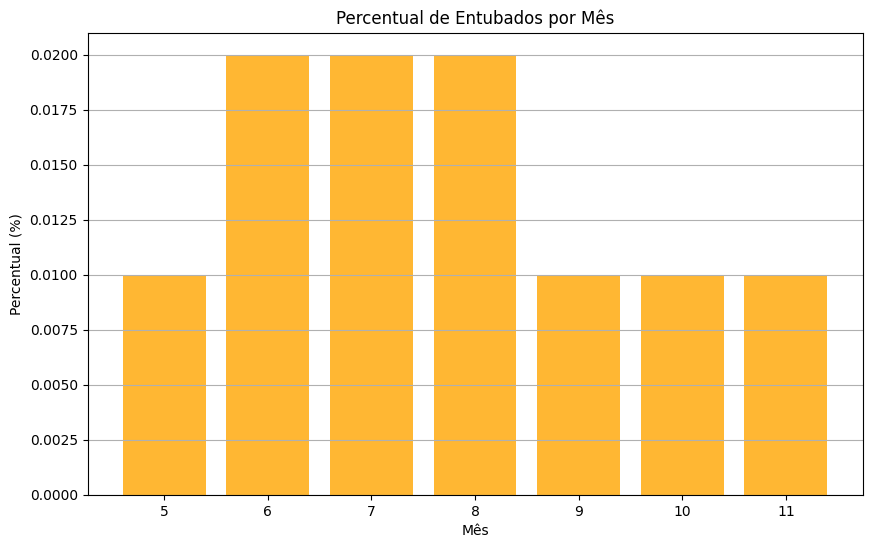

Resumo das Análises Clínicas:

    ANO  MES  qtd_febre  qtd_tosse  qtd_entubados  perc_entubados  \
0  2020    5       8448      12099             50            0.01   
1  2020    6       6545       8973             62            0.02   
2  2020    7       5832       8482             68            0.02   
3  2020    8       4880       7863             63            0.02   
4  2020    9       3084       5540             47            0.01   
5  2020   10       2768       4574             44            0.01   
6  2020   11       3168       5259             39            0.01   

   total_sintomas  
0           20547  
1           15518  
2           14314  
3           12743  
4            8624  
5            7342  
6            8427  


<ipython-input-20-277270f0b0c8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultados['total_sintomas'] = df['qtd_febre'] + df['qtd_tosse']


In [20]:
# 2. Internações e Gravidade
# Percentual de entubados entre a população entrevistada
def plot_internacoes(df):
    """Gráfico de barras para internações graves (entubados)."""
    plt.figure(figsize=(10, 6))
    plt.bar(df['MES'], df['perc_entubados'], color='orange', alpha=0.8)
    plt.title('Percentual de Entubados por Mês')
    plt.xlabel('Mês')
    plt.ylabel('Percentual (%)')
    plt.xticks(df['MES'])
    plt.grid(axis='y')
    plt.show()

plot_internacoes(df)

# Resultados e Insights
# Calcular os totais de sintomas leves e casos graves por mês
resultados = df[['ANO', 'MES', 'qtd_febre', 'qtd_tosse', 'qtd_entubados', 'perc_entubados']]
resultados['total_sintomas'] = df['qtd_febre'] + df['qtd_tosse']

# Exibir resultados calculados para referência
print("Resumo das Análises Clínicas:\n")
print(resultados)

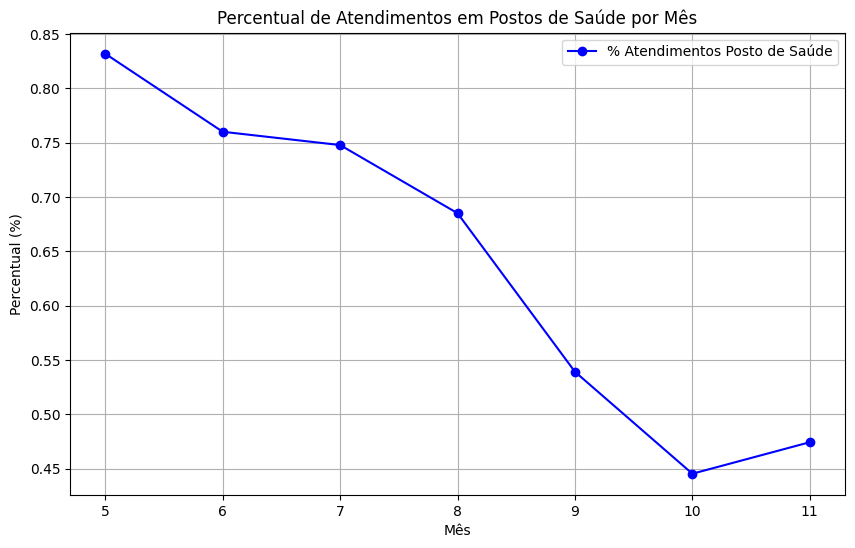

In [15]:
# 2. Atendimentos e Infraestrutura
# Percentual de atendimentos em postos de saúde sobre o total entrevistado
def plot_percentual_posto_saude(df):
    """Gráfico de linha para percentual de atendimentos em postos de saúde."""
    df['perc_posto_saude'] = (df['qtd_posto_saude'] / df['qtd_populacao_entrevistada']) * 100
    plt.figure(figsize=(10, 6))
    plt.plot(df['MES'], df['perc_posto_saude'], label='% Atendimentos Posto de Saúde', marker='o', color='blue')
    plt.title('Percentual de Atendimentos em Postos de Saúde por Mês')
    plt.xlabel('Mês')
    plt.ylabel('Percentual (%)')
    plt.xticks(df['MES'])
    plt.legend()
    plt.grid()
    plt.show()

plot_percentual_posto_saude(df)

In [16]:
# Infraestrutura Hospitalar (Capacidade)
def infraestrutura_insights(df):
    """Resumo textual sobre a infraestrutura hospitalar."""
    ventiladores = df['qtd_entubados'].sum()
    print(f"\nInfraestrutura Hospitalar:\n")
    print(f"Total de pacientes que necessitaram ventiladores: {ventiladores}")

infraestrutura_insights(df)


Infraestrutura Hospitalar:

Total de pacientes que necessitaram ventiladores: 373


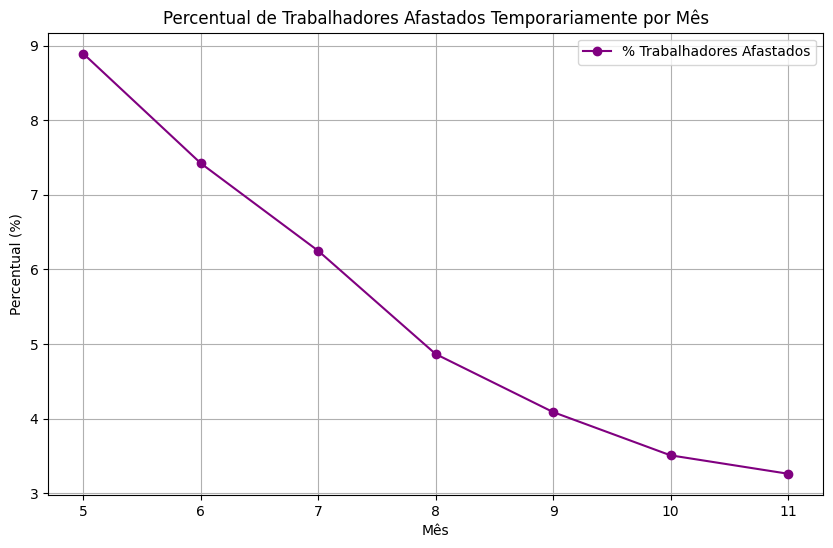

In [17]:
# 3. Impacto Econômico
# Percentual de trabalhadores afastados temporariamente
def plot_afastados(df):
    """Gráfico de linha para percentual de trabalhadores afastados."""
    df['perc_afastados'] = (df['qtd_afastados'] / df['qtd_populacao_entrevistada']) * 100
    plt.figure(figsize=(10, 6))
    plt.plot(df['MES'], df['perc_afastados'], label='% Trabalhadores Afastados', marker='o', color='purple')
    plt.title('Percentual de Trabalhadores Afastados Temporariamente por Mês')
    plt.xlabel('Mês')
    plt.ylabel('Percentual (%)')
    plt.xticks(df['MES'])
    plt.legend()
    plt.grid()
    plt.show()

plot_afastados(df)

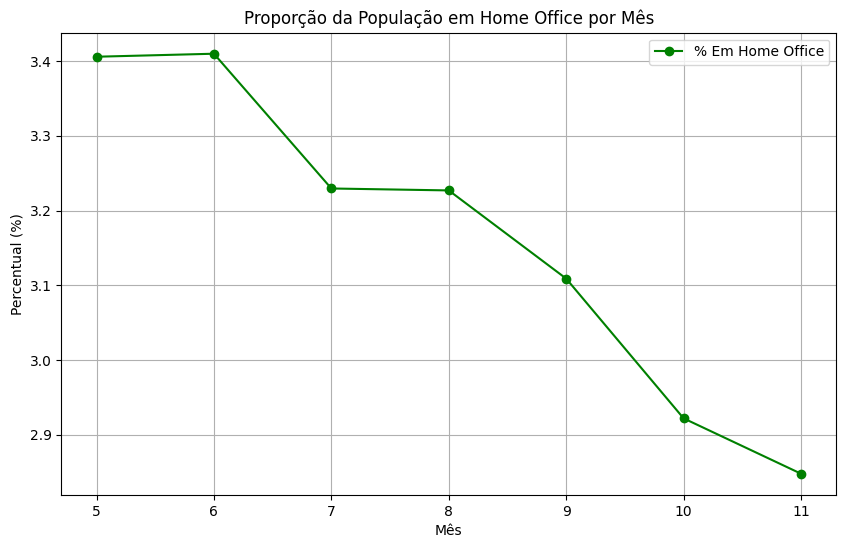

In [18]:
# Proporção da população em home office
def plot_home_office(df):
    """Gráfico de linha para população em home office."""
    df['perc_home_office'] = (df['qtd_em_home_office'] / df['qtd_populacao_entrevistada']) * 100
    plt.figure(figsize=(10, 6))
    plt.plot(df['MES'], df['perc_home_office'], label='% Em Home Office', marker='o', color='green')
    plt.title('Proporção da População em Home Office por Mês')
    plt.xlabel('Mês')
    plt.ylabel('Percentual (%)')
    plt.xticks(df['MES'])
    plt.legend()
    plt.grid()
    plt.show()

plot_home_office(df)

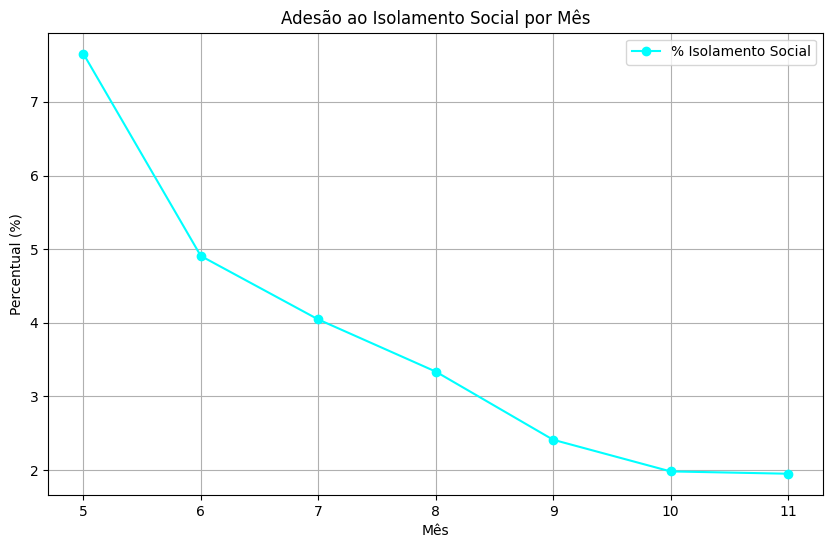

In [19]:
# 4. Comportamento Social
# Adesão às medidas preventivas (isolamento social)
def plot_medidas_preventivas(df):
    """Gráfico de linha para adesão ao isolamento social."""
    df['perc_isolamento'] = (df['qtd_ficou_em_casa'] / df['qtd_populacao_entrevistada']) * 100
    plt.figure(figsize=(10, 6))
    plt.plot(df['MES'], df['perc_isolamento'], label='% Isolamento Social', marker='o', color='cyan')
    plt.title('Adesão ao Isolamento Social por Mês')
    plt.xlabel('Mês')
    plt.ylabel('Percentual (%)')
    plt.xticks(df['MES'])
    plt.legend()
    plt.grid()
    plt.show()

plot_medidas_preventivas(df)